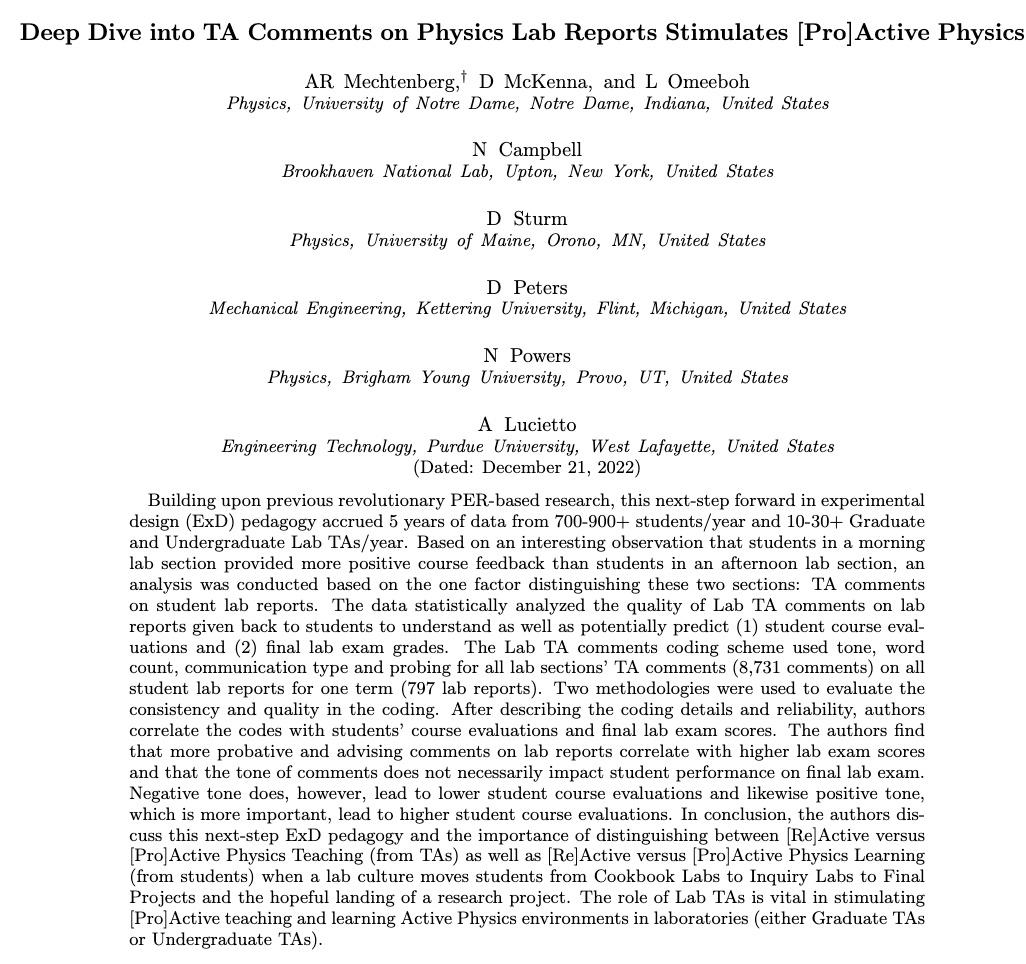

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.gridspec as gridspec
from scipy import stats, integrate
from scipy.optimize import curve_fit
#import uncertainties.unumpy as unp
#import uncertainties as unc
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
from pandas import DataFrame
import math
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import google.colab

In [2]:
!git clone https://github.com/abigailmechtenberg/APS-PRPER-ExD.git

Cloning into 'APS-PRPER-ExD'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 318 (delta 107), reused 137 (delta 53), pack-reused 113 (from 1)
Receiving objects: 100% (318/318), 31.98 MiB | 11.19 MiB/s, done.
Resolving deltas: 100% (145/145), done.


In [3]:
%cd APS-PRPER-ExD

!git pull

/content/APS-PRPER-ExD
Already up to date.


In [4]:
from pathlib import Path

path_to_colab = Path("/content/APS-PRPER-ExD")

In [14]:
# Data includes Class (C), lab Section (S),
# Student Group submitting lab reports (Grp), and Lab TA who wrote comment (TA),
# C+S+Grp is Lab Report Comments by Class, Student, and Group
# C+S+TA is Lab Report Comments by Class, Student, and Lab TA
# Lab Report number (Labnum),
# Word Count of a specific lab report comment (Word Count),
# Tone of a specific lab report comment (Tone),
# Complexity of a specific lab report comment (Complexity),
# Probative of a specific lab report comment (Probative),
# Judging versus Advising evaluation of a specific lab report comment by a Lab TA (JATA)
# CIF is for students' lab course instructor feedback at institution
# FE-Exam is for Physics Lab 1 students' lab final exam (Physics 2 did an extensive
# final lab project and no lab final exam)

data_group1_df = pd.read_excel(path_to_colab / 'Paper_1/data_group1.xlsx', header = 0,sheet_name = 'Sheet1')
data_group1_np = data_group1_df.to_numpy()

# print(data_group1_df.head()) # delete comment to see data
# print(data_group1_np)        # delete comment to see data

data_group2_df = pd.read_excel(path_to_colab / 'Paper_1/data_group2.xlsx', header = 0,sheet_name = 'Sheet1')
data_group2_np = data_group2_df.to_numpy()
#print(data_group2_df)

# print(data_group2_df.head())  # delete comment to see data
# print(data_group2_np)         # delete comment to see data

data_group3_df = pd.read_excel(path_to_colab / 'Paper_1/data_group3.xlsx', header = 0,sheet_name = 'Sheet1')
data_group3_np = data_group3_df.to_numpy()

# print(data_group3_df.head())  # delete comment to see data
# print(data_group3_np)         # delete comment to see data

data_group4_df = pd.read_excel(path_to_colab / 'Paper_1/data_group4.xlsx', header = 0,sheet_name = 'Sheet1')
data_group4_np = data_group4_df.to_numpy()

#print(data_group4_df)

In [15]:
X=data_group3_df[['Probative','JATA']]
X = X[:]
Y=data_group3_df[['FE-Total']]
Y = Y[:]
print(X[1:])

model = sm.OLS(Y, X)
results = model.fit()

results.summary()

     Probative      JATA
1     0.896104  0.792208
2     0.896104  0.792208
3     0.673267  0.554455
4     0.673267  0.554455
5     0.673267  0.554455
..         ...       ...
106   0.800000  0.320000
107   0.800000  0.320000
108   0.800000  0.320000
109   0.855263  0.421053
110   0.855263  0.421053

[110 rows x 2 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               FE-Total   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              2124.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):                    5.07e-88
Time:                        19:49:06   Log-Likelihood:                         -451.13
No. Observations:                 111   AIC:                                      906.3
Df Residuals:                     109   BIC:                                      911.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Probative    101.8558      8.967     11.359      0.000      84.083     119.629
JATA           5.9136     13.029      0.454      0.651     -19.910      31.737
==============================================================================
Omnibus:                       12.081   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.716
Skew:                           0.804   Prob(JB):                      0.00173
Kurtosis:                       3.405   Cond. No.                         11.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X=data_group3_df[['Probative','JATA']]
X = X[:]
Y=data_group3_df[['FE-Total']]
Y = Y[:]
print(X[1:])

model = sm.OLS(Y, X)
results = model.fit()

results.summary()

     Probative      JATA
1     0.896104  0.792208
2     0.896104  0.792208
3     0.673267  0.554455
4     0.673267  0.554455
5     0.673267  0.554455
..         ...       ...
106   0.800000  0.320000
107   0.800000  0.320000
108   0.800000  0.320000
109   0.855263  0.421053
110   0.855263  0.421053

[110 rows x 2 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               FE-Total   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              2124.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):                    5.07e-88
Time:                        19:49:09   Log-Likelihood:                         -451.13
No. Observations:                 111   AIC:                                      906.3
Df Residuals:                     109   BIC:                                      911.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Probative    101.8558      8.967     11.359      0.000      84.083     119.629
JATA           5.9136     13.029      0.454      0.651     -19.910      31.737
==============================================================================
Omnibus:                       12.081   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.716
Skew:                           0.804   Prob(JB):                      0.00173
Kurtosis:                       3.405   Cond. No.                         11.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

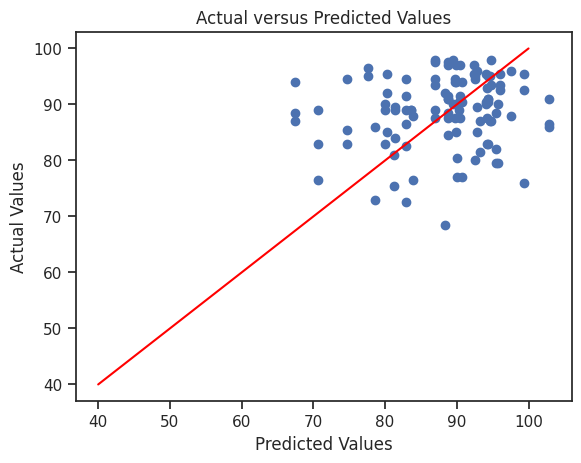

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               FE-Total   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2475.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):                   1.94e-104
Time:                        19:49:12   Log-Likelihood:                         -403.95
No. Observations:                 111   AIC:                                      815.9
Df Residuals:                     107   BIC:                                      826.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Probative     44.0189      7.920      5.558      0.000      28.319      59.719
JATA           0.0627     15.678      0.004      0.997     -31.017      31.143
Word Count    -3.4576     10.650     -0.325      0.746     -24.569      17.654
Tone          66.8251      5.724     11.675      0.000      55.479      78.172
==============================================================================
Omnibus:                        0.551   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.223
Skew:                           0.072   Prob(JB):                        0.895
Kurtosis:                       3.166   Cond. No.                         30.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X=data_group3_df[['Probative','JATA','Word Count','Tone']]
X = X[:]
Y=data_group3_df[['FE-Total']]
Y = Y[:]

import statsmodels.api as sm

model = sm.OLS(Y, X)
results = model.fit()

# Make predictions
y_pred = results.predict(X)

# Create the plot
plt.scatter(y_pred, Y)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Actual versus Predicted Values")

# Add a diagonal line for reference
plt.plot([40,100], [40,100], 'red')  # 45-degree line
plt.show()

results.summary()

         JATA  Probative  JATA_Probative
1    0.792208   0.896104        0.709900
2    0.792208   0.896104        0.709900
3    0.554455   0.673267        0.373297
4    0.554455   0.673267        0.373297
5    0.554455   0.673267        0.373297
..        ...        ...             ...
106  0.320000   0.800000        0.256000
107  0.320000   0.800000        0.256000
108  0.320000   0.800000        0.256000
109  0.421053   0.855263        0.360111
110  0.421053   0.855263        0.360111

[110 rows x 3 columns]


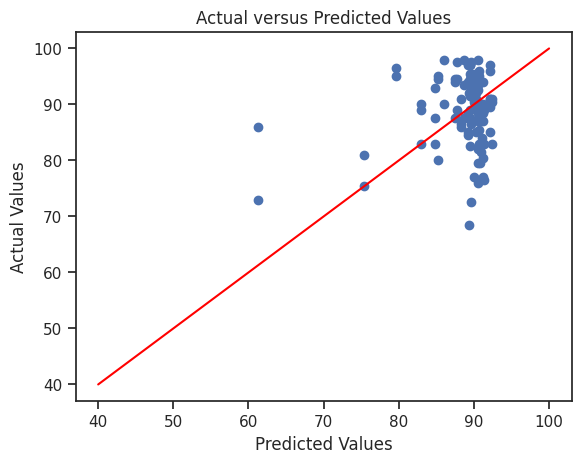

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               FE-Total   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              5494.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):                   7.16e-118
Time:                        19:49:14   Log-Likelihood:                         -376.41
No. Observations:                 111   AIC:                                      758.8
Df Residuals:                     108   BIC:                                      767.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
JATA             169.0315     11.456     14.754      0.000     146.323     191.740
Probative        107.1066      4.605     23.257      0.000      97.978     116.235
JATA_Probative  -199.5383     11.388    -17.522      0.000    -222.111    -176.966
==============================================================================
Omnibus:                        4.178   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                5.012
Skew:                          -0.107   Prob(JB):                       0.0816
Kurtosis:                       4.019   Cond. No.                         24.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
Probative = data_group3_df[['Probative']]
JATA = data_group3_df[['JATA']]
data_group3_df['JATA_Probative'] = JATA['JATA']*Probative['Probative']

X=data_group3_df[['JATA','Probative','JATA_Probative']]
X = X[:]
print(X[1:])

Y=data_group3_df[['FE-Total']]
Y = Y[:]

model = sm.OLS(Y, X)
results = model.fit()

# Make predictions
y_pred = results.predict(X)

# Create the plot
plt.scatter(y_pred, Y)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Actual versus Predicted Values")

# Add a diagonal line for reference
plt.plot([40,100], [40,100], 'red')  # 45-degree line
plt.show()

results.summary()